# 서울시 생활정보 기반 대중교통 수요 분석 프로젝트

* 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 한다.

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

- 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정하고자 한다.

## 0. Data Merge

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [5]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [6]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [7]:
df.head()

,도착 시군구 코드,자치구,남자,여자,합계,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,71890,78563,150453,215,215,"1,548","5,912",618,...,356,105,4500874,4348356,123.298104,119.119987,88.403146,28.184992,75660805,24122435.37
1,11010,종로구,71890,78563,150453,7,7,230,982,12,...,356,105,4500874,4348356,123.298104,119.119987,88.403146,28.184992,75660805,24122435.37
2,11010,종로구,71890,78563,150453,5,5,42,145,4,...,356,105,4500874,4348356,123.298104,119.119987,88.403146,28.184992,75660805,24122435.37
3,11010,종로구,71890,78563,150453,22,22,26,100,9,...,356,105,4500874,4348356,123.298104,119.119987,88.403146,28.184992,75660805,24122435.37
4,11010,종로구,71890,78563,150453,10,10,31,116,11,...,356,105,4500874,4348356,123.298104,119.119987,88.403146,28.184992,75660805,24122435.37


In [8]:
df.rename(columns={'합계': '인구'}, inplace=True)
df["승하차총승객수"] = df["승차총승객수"] + df["하차총승객수"]
df

,도착 시군구 코드,자치구,남자,여자,인구,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,...,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,승하차총승객수
0,11010,종로구,71890,78563,150453,215,215,"1,548","5,912",618,...,105,4500874,4348356,123.298104,119.119987,88.403146,28.184992,75660805,24122435.37,8849230
1,11010,종로구,71890,78563,150453,7,7,230,982,12,...,105,4500874,4348356,123.298104,119.119987,88.403146,28.184992,75660805,24122435.37,8849230
2,11010,종로구,71890,78563,150453,5,5,42,145,4,...,105,4500874,4348356,123.298104,119.119987,88.403146,28.184992,75660805,24122435.37,8849230
3,11010,종로구,71890,78563,150453,22,22,26,100,9,...,105,4500874,4348356,123.298104,119.119987,88.403146,28.184992,75660805,24122435.37,8849230
4,11010,종로구,71890,78563,150453,10,10,31,116,11,...,105,4500874,4348356,123.298104,119.119987,88.403146,28.184992,75660805,24122435.37,8849230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,11250,강동구,226237,237081,463318,120,120,135,390,73,...,22,2515582,2460905,91.578944,89.588445,89.814904,38.220654,67318336,28647259.60,4976487
444,11250,강동구,226237,237081,463318,117,436,63,249,89,...,22,2515582,2460905,91.578944,89.588445,89.814904,38.220654,67318336,28647259.60,4976487
445,11250,강동구,226237,237081,463318,209,372,71,195,153,...,22,2515582,2460905,91.578944,89.588445,89.814904,38.220654,67318336,28647259.60,4976487
446,11250,강동구,226237,237081,463318,157,187,152,509,144,...,22,2515582,2460905,91.578944,89.588445,89.814904,38.220654,67318336,28647259.60,4976487


---

## 1. 가설 수립 

+ Label(=Target) 설정
    * 정해진게 없을 경우: 라벨 데이터 지정 또는 파생변수로 생성
    * 가설마다 라벨데이터가 달라도 상관이 없다.

* 가설 1
  - 인구수와 정류장 수에는 양의 상관관계가 있다.

* 가설 2
    - 승하차 총 승객수와 정류장 수에는 양의 상관관계가 있다.

* 가설 3
    - 특정 업종이 밀집된 지역은 교통 수요(총 이동 인구)가 높을 것이다.

## 2. 단변량 분석

+ 변수의 비즈니스 의미  
    - 구별 요식업 종사자
    - 구별 이동 인원

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 가설 검증

+ 인사이트 도출

In [9]:
def eda_1_n(data, var, bins = 30) :
    # 기초 통계량
    display(data[[var]].describe().T)

    # 시각화
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

In [10]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

# For Mac OS
plt.rc('font', family='AppleGothic')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# # For Windows
# plt.rc('font', family='Malgun Gothic')
# sns.set(font="Malgun Gothic", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

### 1)


,count,mean,std,min,25%,50%,75%,max
인구,448.0,402345.138393,128728.09535,131793.0,320629.0,404939.0,497883.0,660025.0


/Users/dkmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


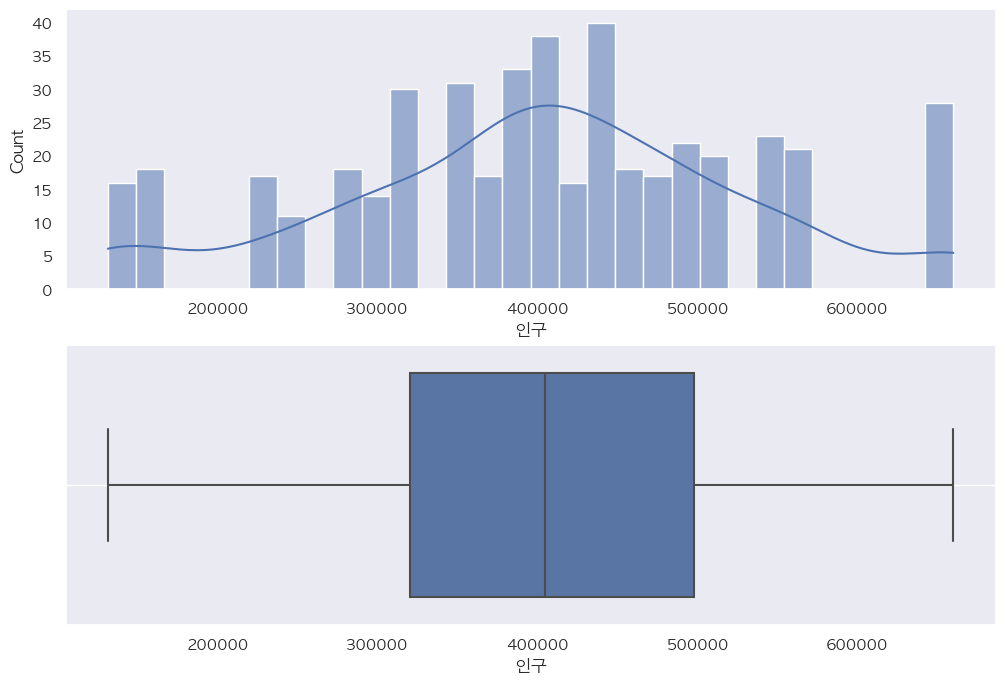

In [11]:
# eda_1_n(df,'인구')
# 기초 통계량
display(df[['인구']].describe().T)

# 시각화
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
sns.histplot(df['인구'], bins = 30, kde = True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = df['인구'])
plt.grid()
plt.show()

,count,mean,std,min,25%,50%,75%,max
정류장수,448.0,434.633929,102.171019,173.0,363.5,456.0,497.0,601.0


/Users/dkmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


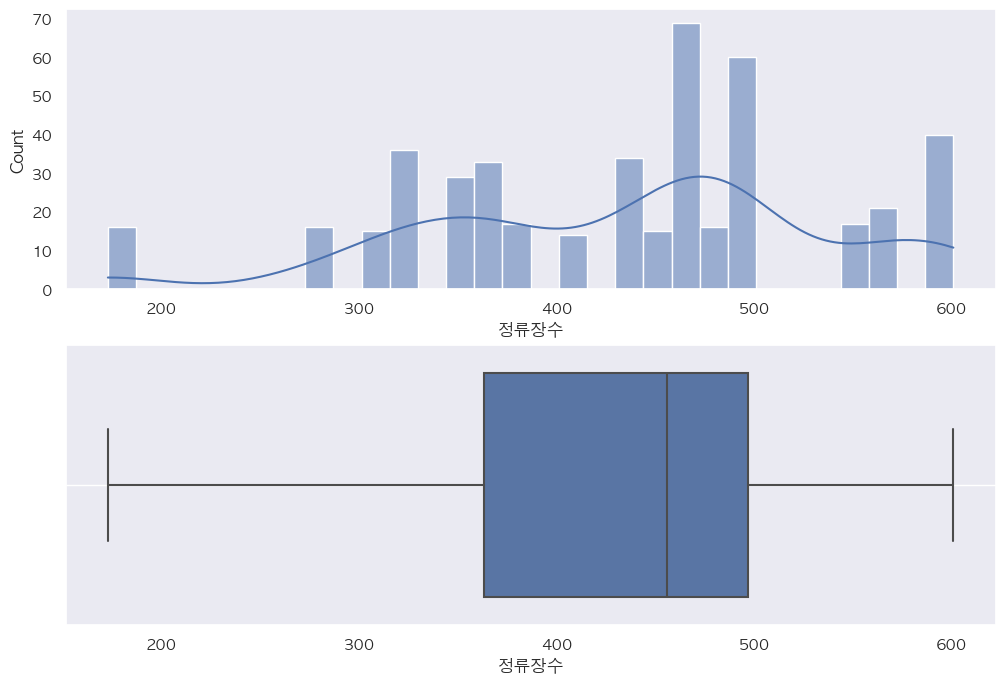

In [12]:
eda_1_n(df,'정류장수')

### 2)

,count,mean,std,min,25%,50%,75%,max
승하차총승객수,448.0,8.341980e+06,2.323003e+06,4702987.0,6822413.0,8227364.0,10028213.0,13557423.0


/Users/dkmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


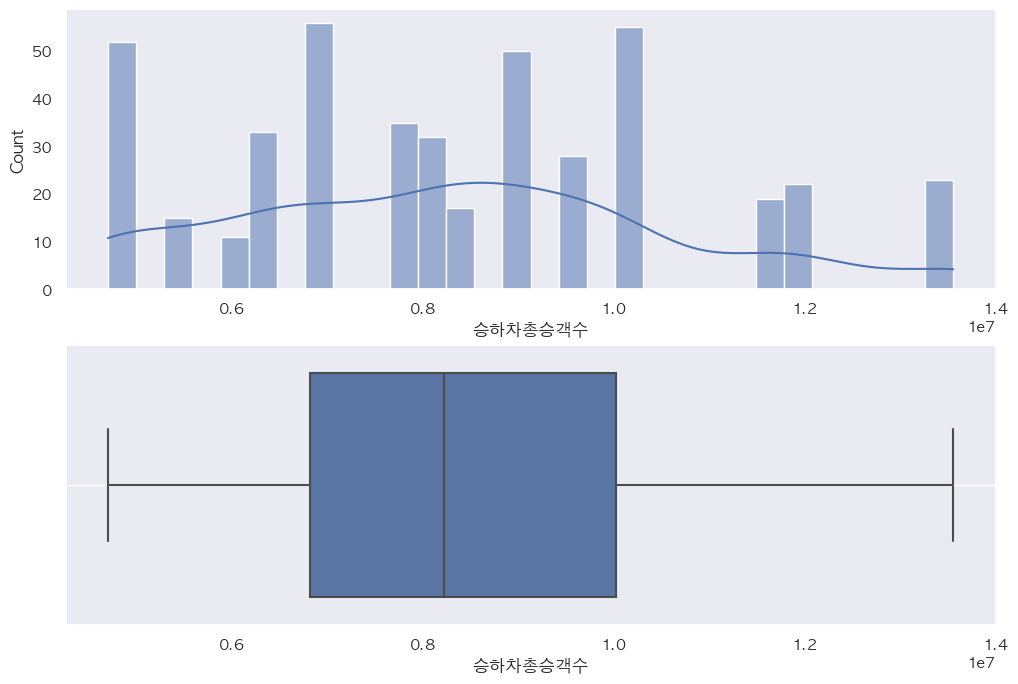

In [13]:
eda_1_n(df,'승하차총승객수')

,count,mean,std,min,25%,50%,75%,max
정류장수,448.0,434.633929,102.171019,173.0,363.5,456.0,497.0,601.0


/Users/dkmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


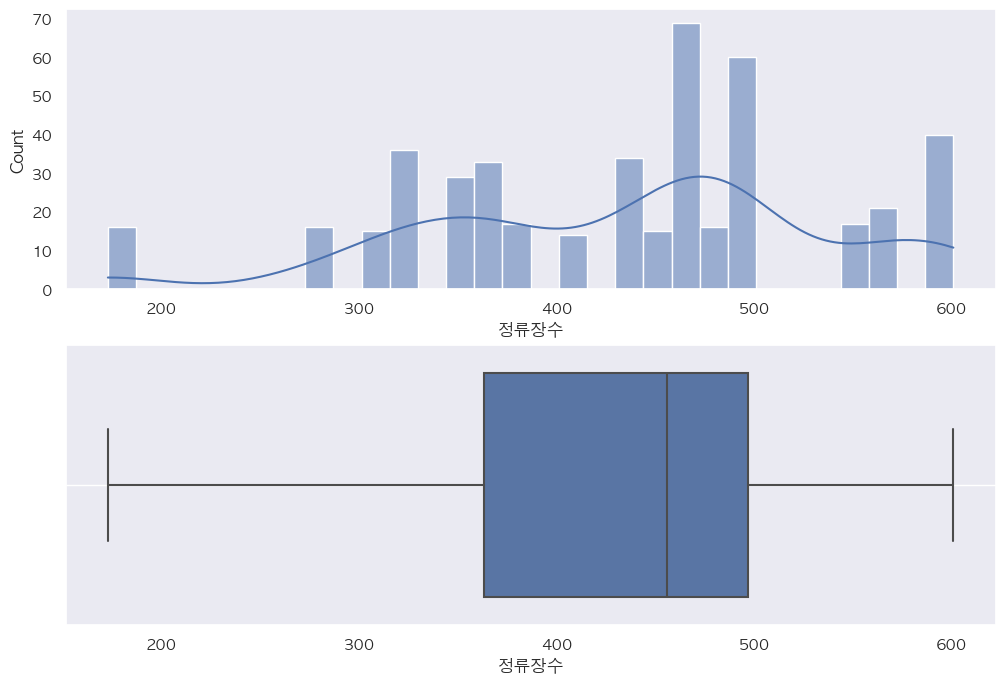

In [14]:
eda_1_n(df,'정류장수')

### 3)

In [ ]:
eda_1_n(df,'요식업 종사자 수')

,count,mean,std,min,25%,50%,75%,max
총 이동인구,448.0,2.645231e+07,1.152614e+07,12184123.01,19948674.26,21475019.31,29571318.3,61257224.24


/Users/dkmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


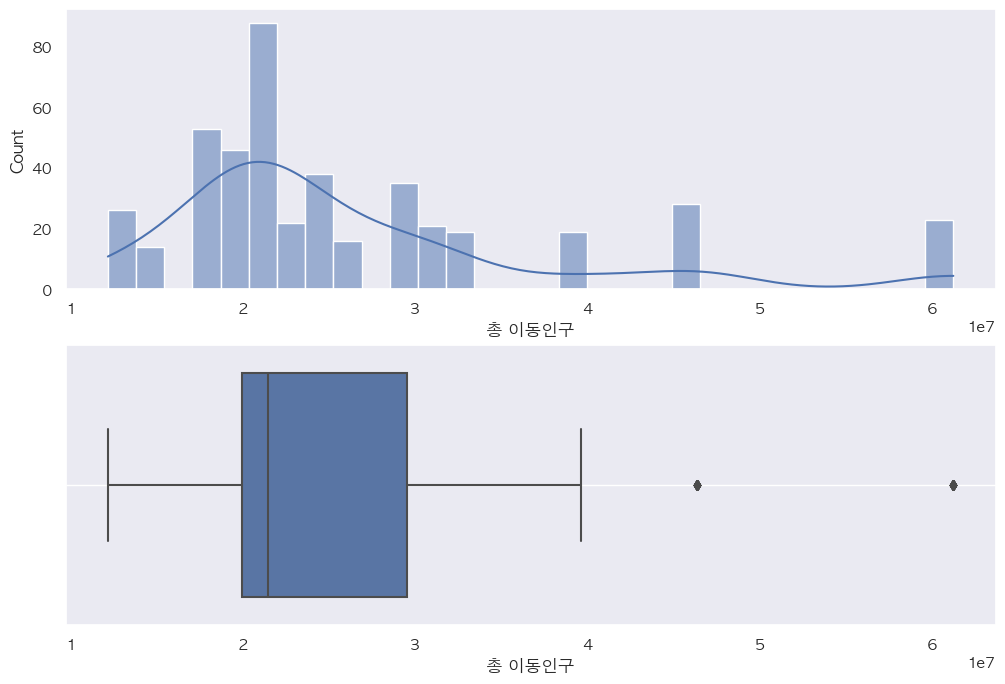

In [16]:
eda_1_n(df,'총 이동인구')

## 3. 이변량 분석

* 자료의 종류에 맞게 X -> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가

* 가설검정시 다음의 항목을 참조하여 수행
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05 -> 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [17]:
def displayScatter(data, x, y):
    plt.scatter(x, y, data = data)
    plt.grid()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

### 1)

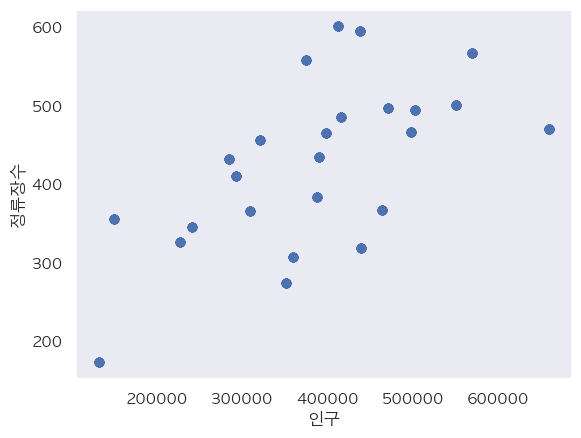

In [18]:
displayScatter(df, '인구', '정류장수')

### 2)

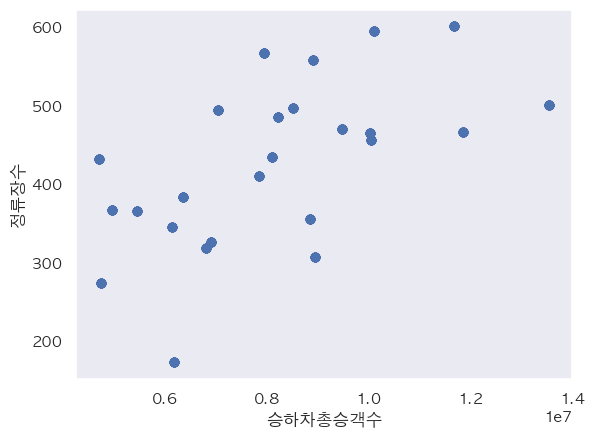

In [19]:
displayScatter(df, '승하차총승객수', '정류장수')

### 3)

In [ ]:
displayScatter(df,'요식업 종사자 수', '총 이동인구')

### HeatMap을 이용한 상관관계 분석

In [20]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

### 1)

In [21]:
spst.pearsonr(df['인구'],df['정류장수'])

PearsonRResult(statistic=0.5884132475828616, pvalue=4.4186048536225406e-43)

### 2)

In [22]:
spst.pearsonr(df['승하차총승객수'],df['정류장수'])

PearsonRResult(statistic=0.5819166698253431, pvalue=5.88646335559821e-42)

### 3)

In [ ]:
spst.pearsonr(df['요식업 종사자 수'],df['총 이동인구'])

In [ ]:
temp = df.drop(['도착 시군구 코드', '자치구'], axis=1)
temp.corr()

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
plt.figure(figsize = (15, 15))
sns.heatmap(temp.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

In [25]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. X. 인구수 -> Y. 정류장 수에는 중간 정도의 상관관계가 있다
# 2. X. 승하차 총 승객수(승차+하차 총승객수) -> Y. 정류장수에는 중간 정도의 상관관계가 있다
# 3. X. 요식업 종사자 수 -> Y. 총 이동인구는 밀접한 상관관계가 있다.

In [ ]:
df["정류장수/총승객"] = df["정류장수"] / df["승하차총승객수"]
df["정류장수/인구수"] = df["정류장수"] / df["인구"]
df["정류장수/총승객-정류장수/인구수"] = df["정류장수/총승객"] - df["정류장수/인구수"]

df['총이동인구/요식업종사자수'] = df['총 이동인구'] / df['요식업 종사자 수']
df

## 4.관계 정리

### 1) 강한 관계의 변수

- 요식업 종사자 수 / 총 이동인구
- 인구 / 이동인구
- 승하차 총 승객수 / 정류장수
- 평균 이동시간(분) / 노선수

### 2) 약한 관계의 변수

- 승하차총승객수 / 평균 이동 시간(분)
- 요식업 종사자 수  / 평균 이동 시간(분)

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.

1. 두개의 관계를 도출한것을 종합하여 구별 인구와 정류장수의 상관계수(가설1)가 구별 승하차 인구와 정류장수의 상관계수(가설2)보다 높다.(하지만 차이는 미미하다..)
이 수치는 현재 승하차 인원보다는 구별 인구 기준으로 정류장이 설치되어있을 가능성을 제시하고 있다.
인구보다는 실제 승하차 인원 기준으로 정류장을 세워야 한다.
"정류장수/총승객-정류장수/인구수"열을 통해 교통 실수요를 측정하고 실수요 대비 정류장이 부족한 구를 우선 추천한다
정류장수/총승객수-정류장수/인구수 가 가장 작은 종로구, 마포구 성동구에 신규 정류장 추천

2. 가설 3는 '총이동인구/요식업종사자수'를 통해 요식업 종사자 수보다 이동하는 인구의 비율이 다른 곳보다 많다면 비교적 붐빈다는 것을 알 수 있고 큰 비율을 가지고 있는 '노원구', '강동구'에 신규 노선을 추천